# Predicting heart disease using ML

This notebook looks into using various Pyhton-based machine learning and DS libraries in an attempt to build machine learning estimator capable of predicting whether or not someone has heart disease based on their medical attributes.

Workflow:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

> With clinical parameters about a patient, we can predict if they have or not a heart disease?

## 2. Data
The original data came from UCI Machine Learning Repository:

https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available on Kaggle:

https://www.kaggle.com/ronitf/heart-disease-uci

### Creators:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

> This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.




## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the preoject.

## 4. Features

> Getting different information about each feature in data.

### Data dictionary:

* age:
age in years

* sex:
(1 = male; 0 = female)

* cp:
chest pain type:
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

* trestbps:
resting blood pressure (in mm Hg on admission to the hospital)

* chol:
serum cholestoral in mg/dl

* fbs:
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

* restecg:
resting electrocardiographic results

* thalach:
maximum heart rate achieved

* exang:
exercise induced angina (1 = yes; 0 = no)

* oldpeak:
ST depression induced by exercise relative to rest

* slope:
the slope of the peak exercise ST segment

* ca:
number of major vessels (0-3) colored by flourosopy

* thal:
3 = normal; 6 = fixed defect; 7 = reversable defect

* target:
1 or 0 (heart disease or not)

## Preparing libraries that I'll use
I will use pandas, numpy & matplotlib for data analysis and manipulations.

In [1]:
# Import all libraries such as regular EDA (exploratory data analysis) and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# I want the plots to appear inside the notebook
%matplotlib inline 

# Estimators from scikit-learn (in order according scikit-learn map for choosing model)
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve # scores for classification problems

## Loading data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration (exploratory data analysis or EDA)

The goal is to find more about the data and become a subject matter export on the data set that I working with.

> 1. What question(s) are I trying to solve?
> 2. What kind of data I have and how do we treat different types?
> 3. What's missing from the data and how I deal with it?
> 4. Where are the outliers and why should you care about them?
> 5. How I can add, change or remove features to get more out of my data?

In [3]:
df.shape # rows and columns

(303, 14)

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Don't have missing values.

In [5]:
# Find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

Is a balanced problem.

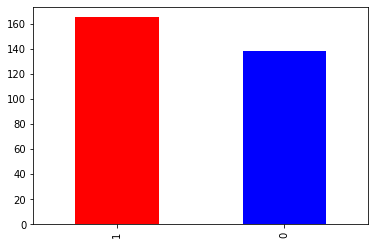

In [6]:
df["target"].value_counts().plot(kind="bar", color=["red", "blue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Only numerical features.

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
data_dictionary = {"age": ["age in years"],
"sex": ["(1 = male; 0 = female)"],
"cp": ["chest pain type: Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic"],
"trestbps": ["resting blood pressure (in mm Hg on admission to the hospital)"],
"chol": ["serum cholestoral in mg/dl"],
"fbs": ["(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)"],
"restecg": ["resting electrocardiographic results"],
"thalach": ["maximum heart rate achieved"],
"exang": ["exercise induced angina (1 = yes; 0 = no)"],
"oldpeak": ["ST depression induced by exercise relative to rest"],
"slope": ["the slope of the peak exercise ST segment"],
"ca": ["number of major vessels (0-3) colored by flourosopy"],
"thal": ["3 = normal; 6 = fixed defect; 7 = reversable defect"],
"target": ["1 or 0 (heart disease or not)"]}
pd.DataFrame.from_dict(data_dictionary)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,age in years,(1 = male; 0 = female),"chest pain type: Value 1: typical angina, Valu...",resting blood pressure (in mm Hg on admission ...,serum cholestoral in mg/dl,(fasting blood sugar &gt; 120 mg/dl) (1 = true...,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina (1 = yes; 0 = no),ST depression induced by exercise relative to ...,the slope of the peak exercise ST segment,number of major vessels (0-3) colored by flour...,3 = normal; 6 = fixed defect; 7 = reversable d...,1 or 0 (heart disease or not)


In [11]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

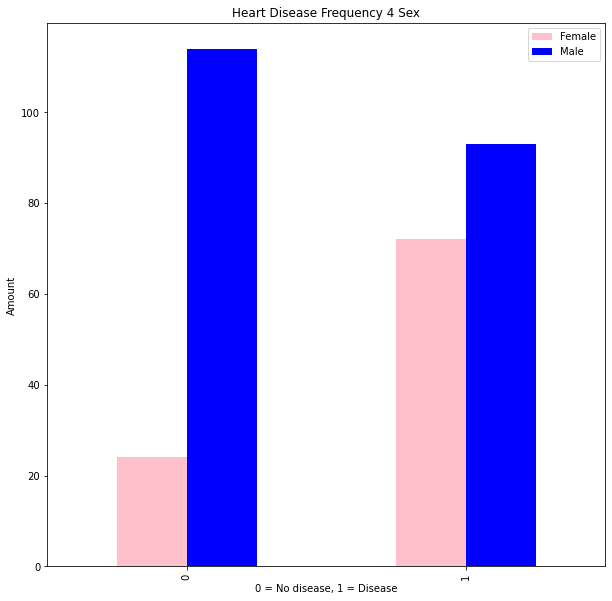

In [13]:
# create a plot of crosstab

pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,10),
                                   color=["pink", "blue"])
plt.title("Heart Disease Frequency 4 Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);

In [14]:
data_dictionary = pd.DataFrame.from_dict(data_dictionary)
data_dictionary

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,age in years,(1 = male; 0 = female),"chest pain type: Value 1: typical angina, Valu...",resting blood pressure (in mm Hg on admission ...,serum cholestoral in mg/dl,(fasting blood sugar &gt; 120 mg/dl) (1 = true...,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina (1 = yes; 0 = no),ST depression induced by exercise relative to ...,the slope of the peak exercise ST segment,number of major vessels (0-3) colored by flour...,3 = normal; 6 = fixed defect; 7 = reversable d...,1 or 0 (heart disease or not)


### Age x Max heart rate (thalach)

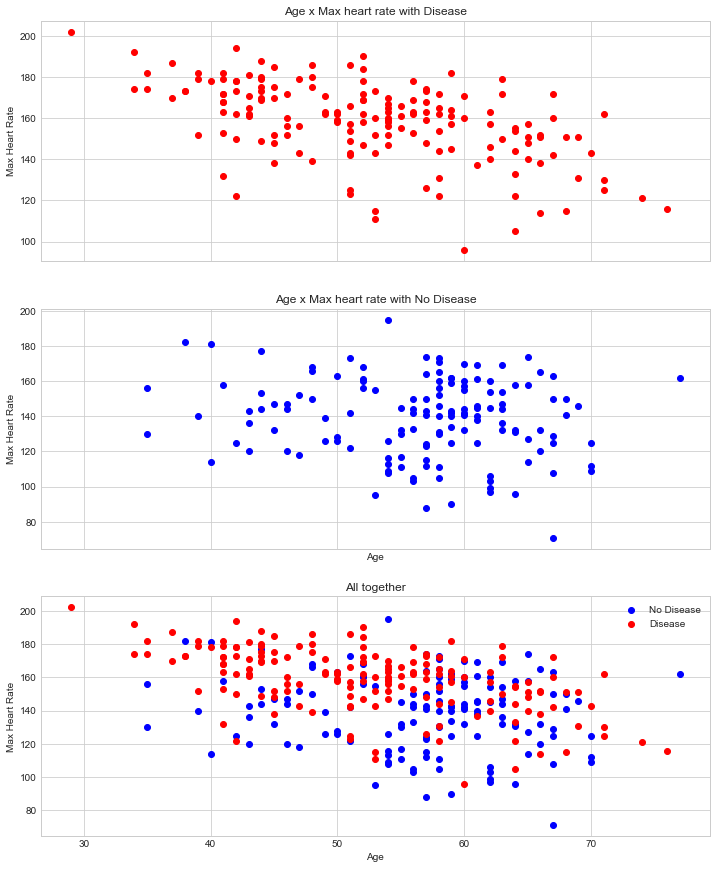

In [15]:
# creating a plot
plt.style.use('seaborn-whitegrid')

# subplots
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,
                              ncols=1,
                              figsize=(12,15),
                              sharex=True)

# add data to axes 0
scatter = ax0.scatter(x=df.age[df.target==1],
                      y=df.thalach[df.target==1],
                      c="red")
# customize ax0
ax0.set(title="Age x Max heart rate with Disease",
        ylabel="Max Heart Rate")

# add data to axes 1
scatter = ax1.scatter(x=df.age[df.target==0],
                      y=df.thalach[df.target==0],
                      c="blue")
# customize ax1
ax1.set(title="Age x Max heart rate with No Disease",
        ylabel="Max Heart Rate",
       xlabel="Age")

# add data to axes 2
scatter = ax2.scatter(x=df.age[df.target==0],
                      y=df.thalach[df.target==0],
                      c="blue")
scatter = ax2.scatter(x=df.age[df.target==1],
                      y=df.thalach[df.target==1],
                      c="red")
# customize ax2
ax2.set(title="All together",
        ylabel="Max Heart Rate",
       xlabel="Age");
plt.legend(["No Disease", "Disease"]);

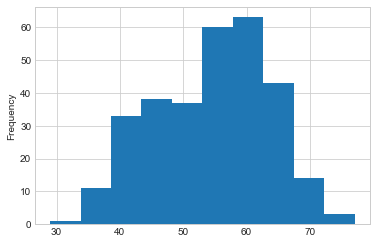

In [16]:
df["age"].plot(kind="hist");

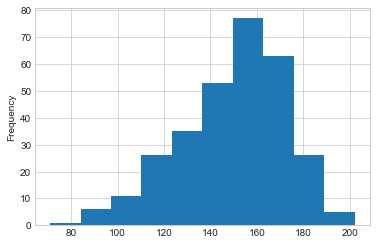

In [17]:
df["thalach"].plot(kind="hist");

### Heart Disease Frequency per Chest Pain Type
* cp:
chest pain type:
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic

In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


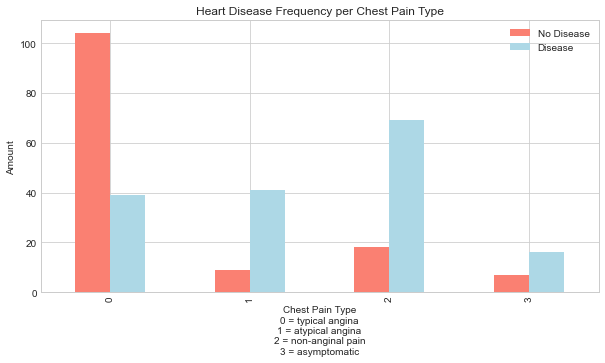

In [19]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,5),
                                  color=["salmon", "lightblue"]);
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type\n0 = typical angina\n1 = atypical angina\n2 = non-anginal pain\n3 = asymptomatic")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"]);

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Make a correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


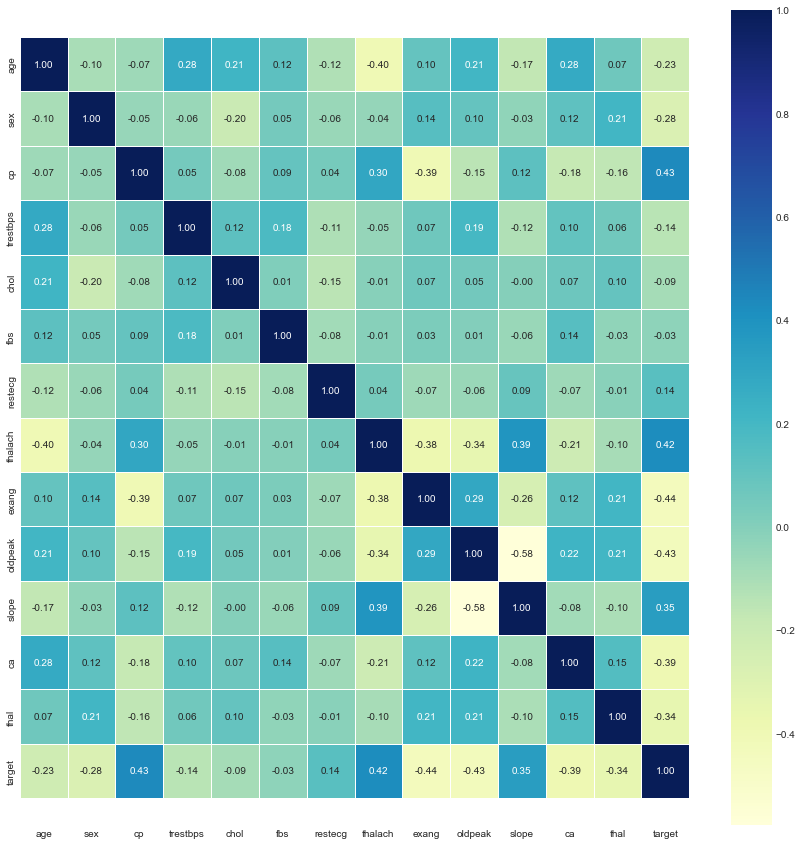

In [22]:
corr_matrix = df.corr()

fig, ax =plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

### 5. Modelling

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

# train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


Choosing the right estimator on: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

1. Linear SVC

In [26]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [27]:
from sklearn import svm
clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8688524590163934

In [28]:
y_preds = clf.predict(X_test)
print(classification_report(y_preds, y_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Trying Logistic Regression, I found the doc here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [29]:
models = {
    "LinearSVC": svm.SVC(kernel="linear"),
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [30]:
# create a function to fit and score estimators
def fit_and_score (models, X_train, X_test, y_train, y_test):
    """
        This function fit and evaluate the models that I put in.
        models = a dict of different models for ML.
        X_train = set of X to train
        X_test = set of X for test
        y_train = set of y to train
        y_test = set of y for test
    """
    
    # set random seed
    np.random.seed(42)
    
    # Make a dict of score
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        
        # fit the model
        model.fit(X_train, y_train)
        
        #Evaluata the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
        # take preds for classification report
        y_preds = model.predict(X_test)
        confusion_matrix(y_test, y_preds)
        
        # classification reports
        print(f"{name} report:\n{classification_report(y_test, y_preds)}\n")

        
    return model_scores

In [31]:
fit_and_score(models, X_train, X_test, y_train, y_test)

LinearSVC report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Logistic Regression report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


KNN report:
              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg  

{'LinearSVC': 0.8688524590163934,
 'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model comparison

In [32]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare

LinearSVC report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Logistic Regression report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


KNN report:
              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg  

,LinearSVC,Logistic Regression,KNN,Random Forest
accuracy,0.868852,0.885246,0.688525,0.836066


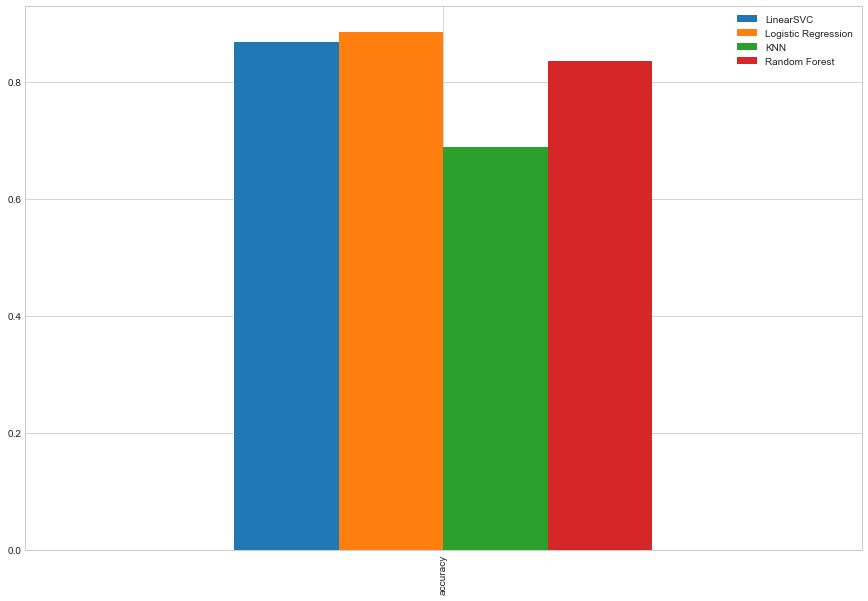

In [33]:
model_compare.plot.bar(figsize=(15,10));

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

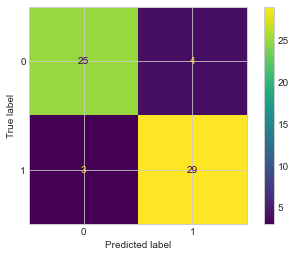

In [35]:

## confusion matrix for logistic regression
lg_regression = LogisticRegression(max_iter=1000)
lg_regression.fit(X_train, y_train)
lg_regression.score(X_test, y_test)
y_preds = lg_regression.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

I will use logistic regression because the results such as accuracy, f1, precision and recall are fine. The confusion matrix prove that we have less samples of false negatives and false positives 

## Tuning the model
* Hyperparameters tuning
* feature importance
* cross validation
* ROC curve
* AUC